In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import math
%matplotlib inline

# Basic Models

In [2]:
time = 50
trials = 100
population = []
init = 300000000
for t in range(trials):
    pop_hist = [init]
    for i in range(time):
        fished = np.random.normal(67000000,25000000)
        pop = pop_hist[-1] * (1-((i*4.3)/(228+40)))
        pop -= fished
        birth = pop*(np.random.normal(50, 10)/100)
        pop += birth
        if pop < 0:
            pop_hist.append(0)
        else:
            pop_hist.append(pop)
    population.append(pop_hist)

'pop' is determined by using the previous years population and multiplying it by the percentage of lobster left from forced displacement. Since lobsters are forced to move about 4.3 miles every year due to rising temperatures (according to [this](https://bangordailynews.com/2019/01/23/bangor-metro/a-warming-trend-is-the-maine-lobster-industry-in-hot-water/)) and we assume that there is an even distribution of lobsters along the Coast of Maine (228 miles according to [this](https://www.sunrisepoint.com/maine-coastline/#:~:text=The%20general%20coastline%20of%20Maine,measures%20to%20be%203%2C478%20miles) website) and 20 miles above and below it, we can determine what percentage has gone too far north subtract that from one to find out what percentage is still cathable. 

Values that came from real life data include: init (actual estimated lobster population in the Coast of Maine), fished (based off of 2019 catch weight (found [here](https://bangordailynews.com/2020/03/06/news/maine-caught-fewer-lobsters-in-2019-but-haul-still-strong/)) divided by average lobster weight (found [here](https://lobsteranywhere.com/lobster-101/#:~:text=A%20minimum%20size%20lobster%20will,1%201%2F2%20pounds%20each)), and pop (explained above).

In [3]:
df = pd.DataFrame(np.transpose(population))
df["time"] = np.linspace(0, time, time + 1)
dfm = pd.melt(df, id_vars=["time"], value_vars=range(100))

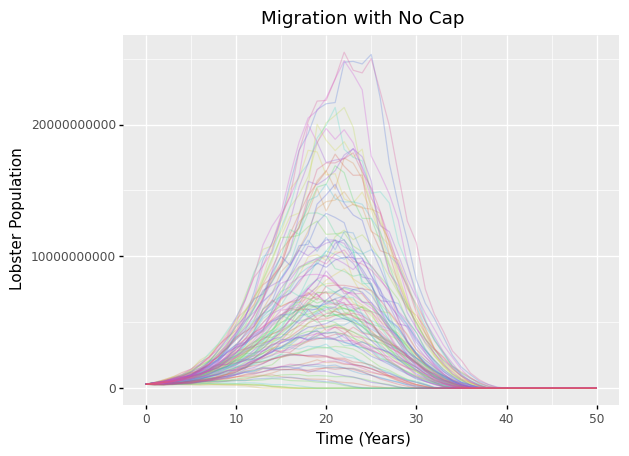

<ggplot: (-9223371873560719308)>

In [4]:
ggplot(dfm, aes(x = "time", y = "value", color="variable")) \
+ geom_line(alpha=0.3) \
+ theme(legend_position="none")\
+ labs(title="Migration with No Cap", x = "Time (Years)", y = "Lobster Population")

This model is a prediction if there could be as many lobsters as possible without taking into account a carrying capacity for the crustaceans or forced northern displacement. As an assumption, we will estimate for later models that their population cannot go over 600 million

In [5]:
time = 50
trials = 100
population = []
init = 300000000
for t in range(trials):
    pop_hist = [init]
    for i in range(time):
        fished = np.random.normal(67000000,20000000)
        pop = pop_hist[-1] * (1-((i*4.3)/(228+40)))
        pop -= fished
        birth = pop*(np.random.normal(50, 10)/100)
        pop += birth
        if pop < 0:
            pop_hist.append(0)
        elif pop > 600000000:
            pop_hist.append(600000000)
        else:
            pop_hist.append(pop)
    population.append(pop_hist)

In [6]:
df = pd.DataFrame(np.transpose(population))
df["time"] = np.linspace(0, time, time + 1)
dfm = pd.melt(df, id_vars=["time"], value_vars=range(100))

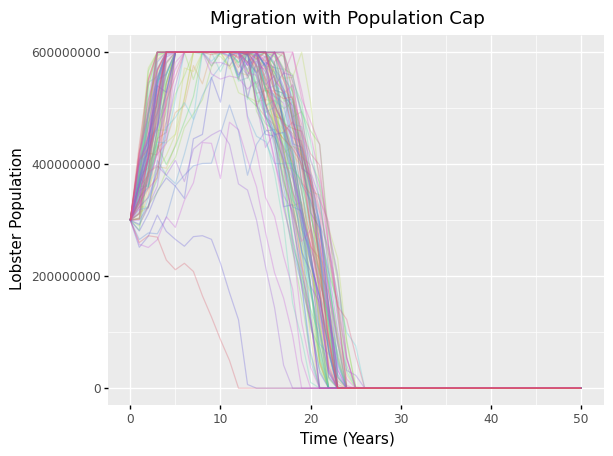

<ggplot: (-9223371873560638780)>

In [7]:
ggplot(dfm, aes(x = "time", y = "value", color="variable")) \
+ geom_line(alpha=0.3) \
+ theme(legend_position="none")\
+ labs(title="Migration with Population Cap", x = "Time (Years)", y = "Lobster Population")

With forced movement and a carrying capacity added, the lobsters will completley be gone within 30 years at most. There are a lot of assumptions in this model though so it should not be taken as a trustworthy model for real life. 

In [8]:
time = 50
trials = 100
population = []
init = 300000000
for t in range(trials):
    pop_hist = [init]
    #print(pop_hist)
    for i in range(time):
        fished = np.random.normal(67000000,20000000)
        pop = pop_hist[-1]  
        pop -= fished
        birth = pop*(np.random.normal(50, 10)/100)
        pop += birth
        if pop < 0:
            pop_hist.append(0)
        elif pop > 600000000:
            pop_hist.append(600000000)
        else:
            pop_hist.append(pop)
    population.append(pop_hist)

In [9]:
df = pd.DataFrame(np.transpose(population))
df["time"] = np.linspace(0, time, time + 1)
dfm = pd.melt(df, id_vars=["time"], value_vars=range(100))

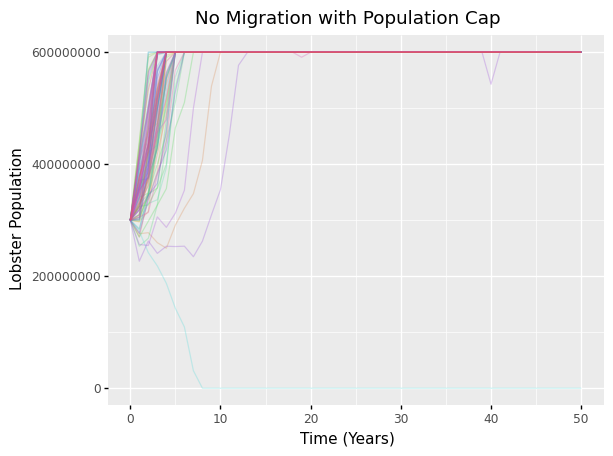

<ggplot: (-9223371873560645344)>

In [10]:
ggplot(dfm, aes(x = "time", y = "value", color="variable")) \
+ geom_line(alpha=0.3) \
+ theme(legend_position="none")\
+ labs(title="No Migration with Population Cap", x = "Time (Years)", y = "Lobster Population")

Without migration, we notice that population will almost never hit zero for any of the trials. This solidifies the idea that forced lobster displacement is the biggest issue facing their population in the Coast of Maine.

# Regulation

In [11]:
time = 50
trials = 100
population = []
init = 300000000
cap = 42000000
caps = []
years = []
avg_years = []
avg_caps = []
for c in range(100):
    for r in range(10):
        for t in range(trials):
            pop_hist = [init]
            for i in range(time):
                fished = np.random.normal(67000000,25000000)
                if fished > cap:
                    fished = cap
                pop = pop_hist[-1] * (1-((i*4.3)/(228+40)))
                pop -= fished
                birth = pop*(np.random.normal(50, 10)/100)
                pop += birth
                if pop < 0:
                    pop_hist.append(0)
                    years.append(i)
                    break
                elif pop > 600000000:
                    pop_hist.append(600000000)
                else:
                    pop_hist.append(pop)
                    if i == 49:
                        years.append(i)
            population.append(pop_hist)
        caps.append(cap)
    if len(years) != 0:
                avg_years.append(sum(years)/len(years))
    else:
        avg_years.append(51)
    years = []
    cap += 500000
    avg_caps.append(sum(caps)/len(caps))
    caps = []

In [12]:
capdf = pd.DataFrame()
capdf["Cap"] = avg_caps
capdf["Year"] = avg_years
capdf

,Cap,Year
0,42000000.0,26.712
1,42500000.0,26.602
2,43000000.0,26.538
3,43500000.0,26.441
4,44000000.0,26.357
...,...,...
95,89500000.0,22.527
96,90000000.0,22.449
97,90500000.0,22.385
98,91000000.0,22.472


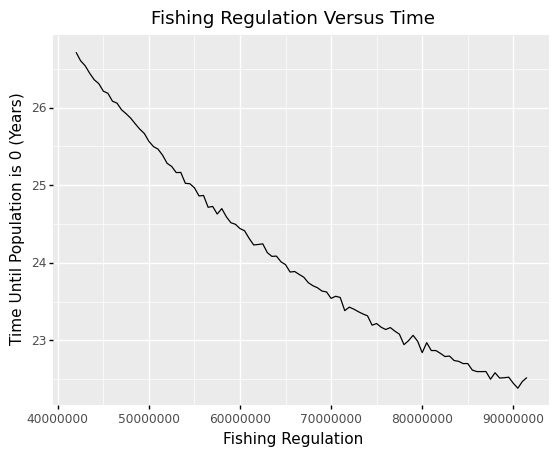

<ggplot: (-9223371873553970016)>

In [13]:
ggplot(capdf, aes(x = "Cap", y = "Year")) \
+ geom_line()\
+ labs(title="Fishing Regulation Versus Time", x = "Fishing Regulation", y = "Time Until Population is 0 (Years)")

This model shows how long until the population will hit zero for lobsters with different yearly max fishing regulations. Even when regulation are at 66% of what the average yearly catch is, it can typically only save the population for another year or two. 

In [14]:
time = 50
trials = 100
population = []
money = []
init = 300000000
for t in range(trials):
    pop_hist = [init]
    money_hist = [init*2.25]
    for i in range(time):
        pop = pop_hist[-1] * (1-((i*4.3)/(228+40)))
        fished = np.random.normal(pop/5,pop/15)
        pop -= fished
        birth = pop*(np.random.normal(50, 10)/100)
        pop += birth
        if pop < 0:
            pop_hist.append(0)
        elif pop > 600000000:
            pop_hist.append(600000000)
        else:
            pop_hist.append(pop)
        money_hist.append(fished*2.25)
    population.append(pop_hist)
    money.append(money_hist)

In [15]:
df = pd.DataFrame(np.transpose(population))
df["time"] = np.linspace(0, time, time + 1)
dfm = pd.melt(df, id_vars=["time"], value_vars=range(100))

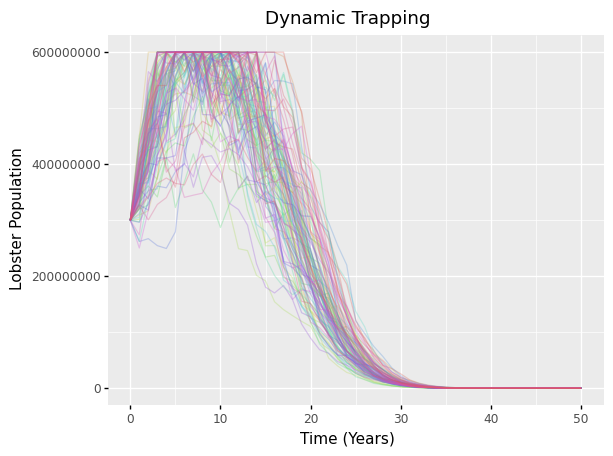

<ggplot: (-9223371873560031044)>

In [16]:
ggplot(dfm, aes(x = "time", y = "value", color="variable")) \
+ geom_line(alpha=0.3) \
+ theme(legend_position="none")\
+ labs(title="Dynamic Trapping", x = "Time (Years)", y = "Lobster Population")

This model only allows fishermen to catch up to 20% of that years population after migration as a regulation. This can put off a zero population by about 5-8 years on average compared to the typical model. This does create a problem with the economic side of lobster catching. According to [this](https://thecounter.org/maine-lobsterman-uncertainty-covid-19/) website, a fisherman can expect to make around 1.5 dollars max now per pound, so about $2.25 per lobster with an average weight of 1.5 lbs.

# Economical Impact

In [17]:
df = pd.DataFrame(np.transpose(money))
df["time"] = np.linspace(0, time, time + 1)
dfm = pd.melt(df, id_vars=["time"], value_vars=range(100))

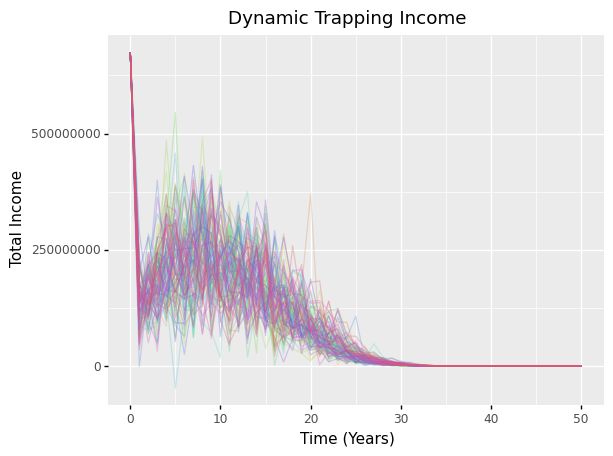

<ggplot: (-9223371873558526936)>

In [18]:
ggplot(dfm, aes(x = "time", y = "value", color="variable")) \
+ geom_line(alpha=0.3) \
+ theme(legend_position="none")\
+ labs(title="Dynamic Trapping Income", x = "Time (Years)", y = "Total Income")

This shows how much total money is brought in from the lobsters every year with dynamic regulations. After around 10 years it starts to decline after around 10 years. 